In [43]:
import csv
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

In [11]:
questions = []
human_answers = []
bot_answers = []

In [12]:
with open('accuracy.csv') as f:
    reader = csv.reader(f)
    next(reader) # discard csv headers
    for row in reader:
        bot_answer, human_answer, question = row.pop(), row.pop(), row.pop()
        bot_answers.append(bot_answer)
        human_answers.append(human_answer)
        questions.append(question)

In [44]:
# create a CountVectorizer object
vectorizer = CountVectorizer()
cosines = []
# fit the vectorizer on the sentences
for i in range(len(questions)):
    vectorizer.fit_transform([human_answers[i], bot_answers[i]])
    # transform the sentences into vectors
    vector1 = vectorizer.transform([human_answers[i]]).toarray()
    vector2 = vectorizer.transform([bot_answers[i]]).toarray()
    # calculate cosine similarity between the two vectors
    cosine_sim = cosine_similarity(vector1, vector2)
    cosines.append(cosine_sim)

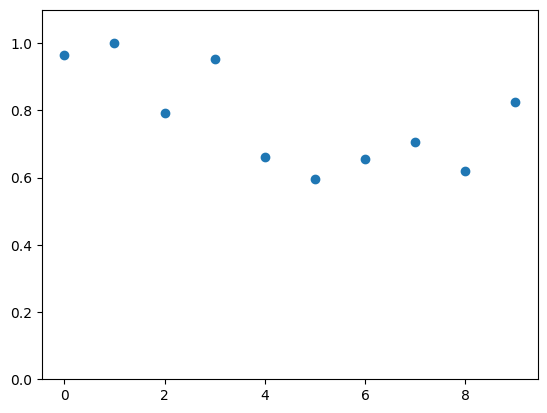

In [55]:
plt.ylim(0, 1.1)
plt.scatter([item for item in range (0, 10)], np.array(cosines).flatten())